In [5]:
#datos importado

#datos
import pandas as pd
import numpy as np
#graficos
import matplotlib.pyplot as plt
import seaborn as sns
#otros
import warnings
warnings.filterwarnings('ignore')


In [19]:
google_df = pd.read_csv(r'C:\Users\Santiago\OneDrive\Documentos\proyecto_CS_google_play_store\googleplaystore.csv')

In [22]:
print(f'np.shape --> {np.shape(google_df)}')

filas = np.shape(google_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(google_df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}')

print('Output de ".head(5)": ')
google_df.head(5)

np.shape --> (10841, 13)
Filas: 10841
Columnas: 13
Output de ".head(5)": 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
# se hace una limpieza de datos en este caso eliminar los datos
google_df.drop_duplicates(subset='App', inplace=True, keep='first')



In [24]:
# Installs
q_installs = len(google_df['Installs'].unique()) # Cantidad de valores unicos en 'Installs'

print(f'En total hay {q_installs} tipos de valores en "Install"\r\n\n')
print(google_df['Installs'].unique())

En total hay 22 tipos de valores en "Install"


['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0'
 'Free']


In [25]:
# Eliminacion manual de valores que no deberiamos tener en columas
google_df = google_df[google_df['Installs'] != 'Free']

# Aqui lo que hicimos fue conservar unicamente los registros cuyos valores en la columa "Installs" sean distintos (=!) a 'Free'
filas = np.shape(google_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

Filas: 9659


In [26]:
#2)
#Reemplaamos los caraccteres '+' y ',' con el comando 'str.replace(a,b)' donde:
# 'a' es el string a reemplazar y 'b' es el string nuevo.  
google_df['Installs'] = google_df['Installs'].str.replace(',','')
google_df['Installs'] = google_df['Installs'].str.replace('+','')

In [27]:
#3) Cambiar el formato string a int
google_df = google_df.astype({"Installs": int})

In [28]:
q_installs = len(google_df['Installs'].unique())
print(f'En total hay {q_installs} labels de Install\r\n\n')
print(google_df['Installs'].unique())
print("Type: ", type(google_df['Installs'].unique()[0]))

En total hay 20 labels de Install


[     10000     500000    5000000   50000000     100000      50000
    1000000   10000000       5000  100000000 1000000000       1000
  500000000         50        100        500         10          1
          5          0]
Type:  <class 'numpy.int32'>


In [29]:
#Size
q_size = len(google_df['Size'].unique()) # Cantidad de valores unicos en 'Size'
print(f'En total hay {q_size} tipos de valores en "Size"\r\n')
print("\n", google_df['Size'].unique())
filas = np.shape(google_df)[0]
print(f'Filas: {filas}')

En total hay 461 tipos de valores en "Size"


 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '39M' '31M' '4.2M' '7.0M' '23M'
 '6.0M' '6.1M' '4.6M' '9.2M' '5.2M' '11M' '24M' 'Varies with device'
 '9.4M' '15M' '10M' '1.2M' '26M' '8.0M' '7.9M' '56M' '57M' '35M' '54M'
 '201k' '3.6M' '5.7M' '8.6M' '2.4M' '27M' '2.5M' '16M' '3.4M' '8.9M'
 '3.9M' '2.9M' '38M' '32M' '5.4M' '18M' '1.1M' '2.2M' '4.5M' '9.8M' '52M'
 '9.0M' '6.7M' '30M' '2.6M' '7.1M' '3.7M' '22M' '7.4M' '6.4M' '3.2M'
 '8.2M' '9.9M' '4.9M' '9.5M' '5.0M' '5.9M' '13M' '73M' '6.8M' '3.5M'
 '4.0M' '2.3M' '7.2M' '2.1M' '42M' '7.3M' '9.1M' '55M' '23k' '6.5M' '1.5M'
 '7.5M' '51M' '41M' '48M' '8.5M' '46M' '8.3M' '4.3M' '4.7M' '3.3M' '40M'
 '7.8M' '8.8M' '6.6M' '5.1M' '61M' '66M' '79k' '8.4M' '118k' '44M' '695k'
 '1.6M' '6.2M' '18k' '53M' '1.4M' '3.0M' '5.8M' '3.8M' '9.6M' '45M' '63M'
 '49M' '77M' '4.4M' '4.8M' '70M' '6.9M' '9.3M' '10.0M' '8.1M' '36M' '84M'
 '97M' '2.0M' '1.9M'

In [30]:
# 1)
#Dejamos el peso de las app en Mb y convertimos aquellas que esten en Kb.
google_df['Size'].replace('Varies with device', np.nan, inplace = True )

In [31]:
# 2.1)
#Eliminamos las letras k y M que estan al final de cada valor.

output = google_df.Size.replace(r'[kM]', '', regex=True).astype(float) # Valores enteros sin las letras k/M
print(output,'\r\n')
print(output.value_counts())

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64 

11.0     183
12.0     181
14.0     178
13.0     177
15.0     163
        ... 
430.0      1
429.0      1
200.0      1
460.0      1
619.0      1
Name: Size, Length: 420, dtype: int64


In [32]:
# 2.2)
# Separamos los grupos K y M
output = google_df.Size.str.extract(r'([kM])', expand=False)
print(output,'\r\n')
print(output.value_counts())

0          M
1          M
2          M
3          M
4          M
        ... 
10836      M
10837      M
10838      M
10839    NaN
10840      M
Name: Size, Length: 9659, dtype: object 

M    8118
k     314
Name: Size, dtype: int64


In [33]:
# 2.3)
#Los NaN los reemplazamos por 1 para no perder registros
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)
print(output,'\r\n')
print(output.value_counts())

0        M
1        M
2        M
3        M
4        M
        ..
10836    M
10837    M
10838    M
10839    1
10840    M
Name: Size, Length: 9659, dtype: object 

M    8118
1    1227
k     314
Name: Size, dtype: int64


In [34]:
# 2.4)
#Homogeneizamos las unidades, k = 10**-3 y M = 1
output = google_df.Size.str.extract(r'([kM])', expand=False).fillna(1)\
.replace(['k','M'], [10**-3, 1]).astype(float)
#print(output,'\r\n')
print(output.value_counts())

1.000    9345
0.001     314
Name: Size, dtype: int64


In [35]:
# Juntamos todo [2.1 a 2.4]
google_df.Size = (google_df.Size.replace(r'[kM]', '', regex=True).astype(float) * \
             google_df.Size.str.extract(r'([KM])', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**-3, 1]).astype(float))

# comentario:
# El simbolo ' \ ' permite escribir una misma linea de codigo en distintas lineas de texto

In [36]:
google_df.Size

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 9659, dtype: float64

In [37]:

# 3)
#Reemplazamos aquellos registros con 'Varies with device' (ahora NaN) con la media del peso segun la categoria
google_df['Size'].fillna(google_df.groupby('Genres')['Size'].transform('mean'), inplace = True)

In [38]:
# A float
google_df['Size'] = google_df['Size'].astype(float)
google_df['Installs'] = google_df['Installs'].astype(float)

In [39]:
# Quitamos simbolo '$' y pasamos a float.
google_df['Price'] = google_df['Price'].str.replace('$','')
google_df['Price'] = google_df['Price'].astype(float)

In [40]:
google_df['Reviews'] = google_df['Reviews'].astype(int)

In [41]:
# Columnas que tienen al menos un nan
col_NaN = google_df.isnull().any()
print(col_NaN,'\r\n')

App               False
Category          False
Rating             True
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool 



In [42]:
# Cantidad de valores nulos ordenados descendentemente
total = google_df.isnull().sum().sort_values(ascending=False)
total

Rating            1463
Current Ver          8
Size                 3
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
dtype: int64

In [43]:
# Cantidad de valores nulos ordenados descendentemente
total = google_df.isnull().sum().sort_values(ascending=False)
# Porcetaje de lo que representa para cada columna
percent = (google_df.isnull().sum()/len(google_df)).sort_values(ascending=False)
# Mostramos los 2 resultados en conjunto.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1463,0.151465
Current Ver,8,0.000828
Size,3,0.000311
Android Ver,2,0.000207
Type,1,0.000104
App,0,0.000000


In [44]:
# Limpiamos registros '.dropna'
google_df.dropna(how ='any', inplace = True)

In [45]:

# Verificamos como quedo el dataset
print(f'Nos quedamos con un dataframe de {google_df.shape[0]} filas x {google_df.shape[1]} columnas')

Nos quedamos con un dataframe de 8187 filas x 13 columnas


In [48]:
#Analisis
#Ahora que terminamos con la limpieza general del dataset, pasemos a analizar:

#1. Rating

#2. Categorias

#3. Categorias vs Rating

#4. Reviews

#5. Precio

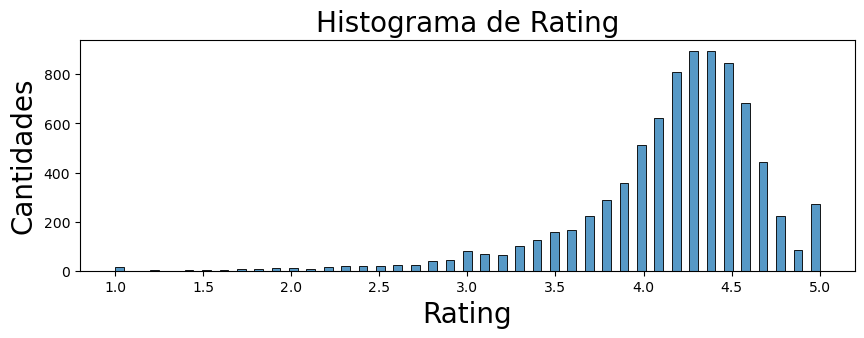

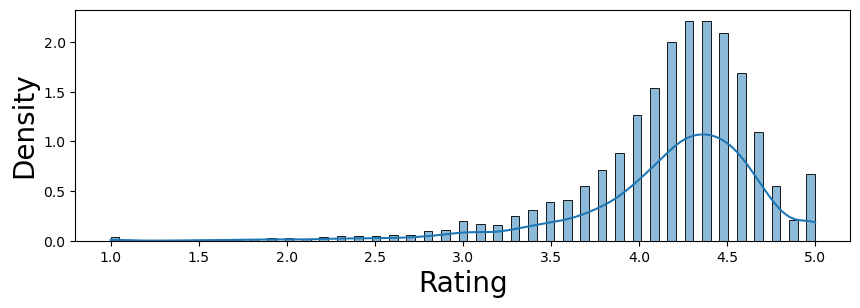

In [49]:
#Rating

plt.figure(figsize=(10,3))
sns.histplot(data=google_df,
             x='Rating',stat='count',kde=False)
plt.xlabel("Rating",size = 20)
plt.ylabel("Cantidades",size = 20)
#plt.xticks([]) # por si deseamos eliminar los intervalos en el eje-x
#plt.imsave('Histogram',format='png') # Guardar la imagen
plt.title('Histograma de Rating',size = 20)
plt.show()


plt.figure(figsize=(10,3))
sns.histplot(data=google_df,
             x='Rating',stat='density',kde=True)
plt.xlabel("Rating",size = 20)
plt.ylabel("Density",size = 20)
#plt.xticks([]) # por si deseamos eliminar los intervalos en el eje-x
#plt.imsave('Histogram',format='png') # Guardar la imagen
plt.show()

In [50]:
# Categorias

# Gardamos en una variable la cantidad de categorias
q_categorias = len(google_df['Category'].unique())
print(f'En total hay {q_categorias} categorias\r\n')
# Mostramos en la cell los tipos de categorias
print("\n", google_df['Category'].unique())

En total hay 33 categorias


 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


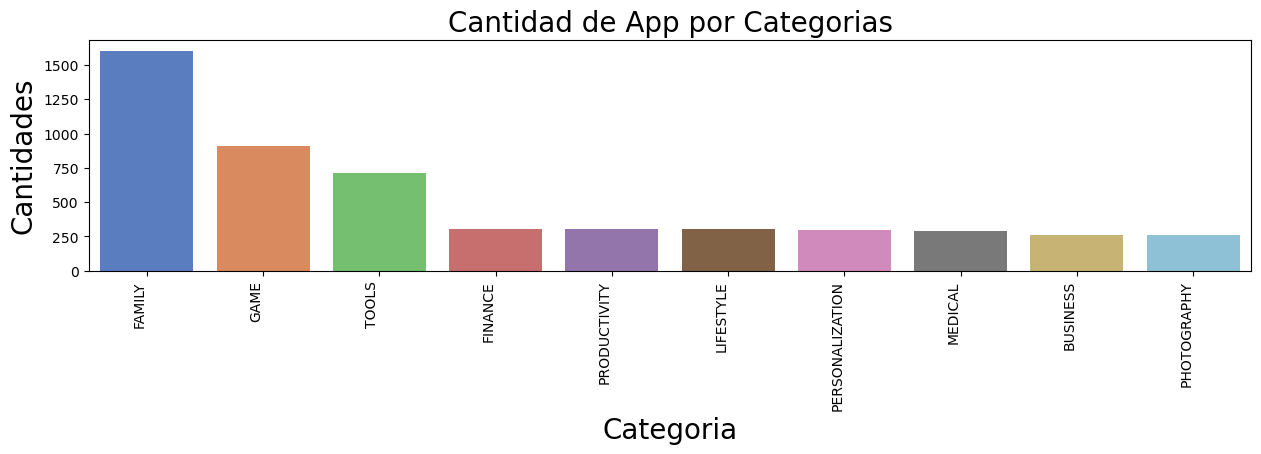

In [51]:
top_n = 10
# Guardamos los indices de los top_n categorias
idx_top = google_df['Category'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(data=google_df,
                  x="Category",
                  order=idx_top,
                  palette = "muted")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de App por Categorias', size = 20)
plt.xlabel("Categoria", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

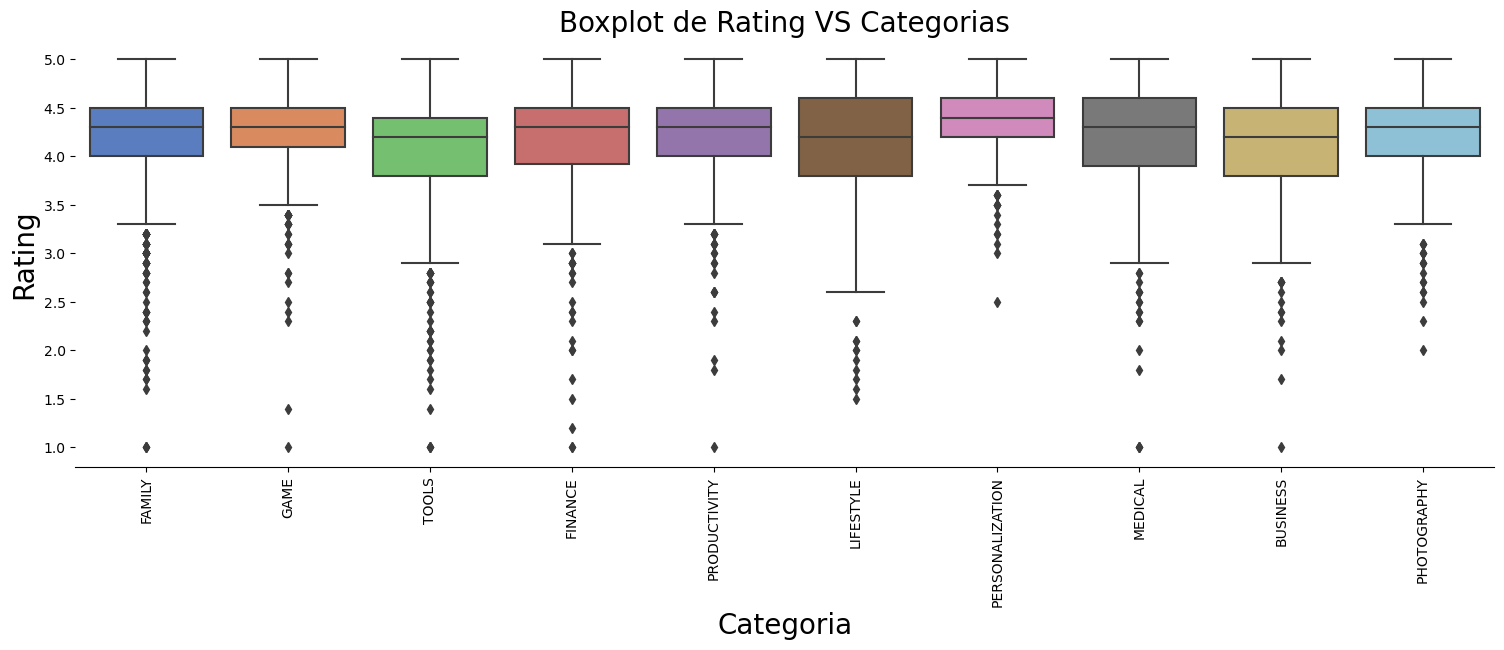

In [53]:
# Categoria vs Rating

# Todas las categorias
g = sns.catplot(data=google_df,
                x="Category",y="Rating", 
                kind="box",
                order=idx_top,
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Categoria",size = 20)
plt.ylabel("Rating",size = 20)
plt.title('Boxplot de Rating VS Categorias',size = 20)
plt.show()

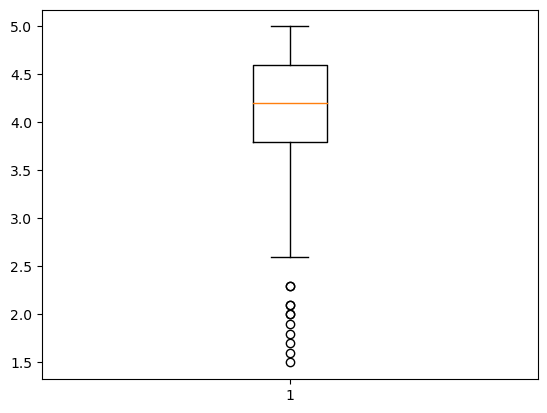

In [55]:
#Mediana, Q1-Q3, whiskers y outliers


cat_select = 'LIFESTYLE'
df_pivot = google_df[google_df['Category']==cat_select]
plt.figure()
bxplot = plt.boxplot(df_pivot['Rating'])
#bxplot = plt.boxplot(df_pivot['Rating'],whis=[15, 82])
plt.show()

In [56]:
# Mediana
medians = bxplot["medians"][0].get_ydata()

# Marcas de Boxplot
low_limits = bxplot["whiskers"][0].get_ydata()
up_limits = bxplot["whiskers"][1].get_ydata()

# Valores Q1 - Q3
Q1 =  low_limits[0]
Q3 =  up_limits[0]

# whiskers: Valores extremos de las lineas que salen del intervalo [Q1-Q3]
low_whiskers =  low_limits[1]
up_whiskers = up_limits[1]

# Outliers = fliers: Valores mas alla de los whiskers 
outliers = bxplot["fliers"][0].get_ydata()

In [57]:
print(f'Valor Mediana:\r\n {medians[0]}\r\n')
print(f'[Q1 - Q3] : [{Q1} - {Q3}]\r\n')
print(f'[Inferior  - Superior]: [{low_whiskers} - {up_whiskers}] \r\n')
print(f'Valores outliers:\r\n{outliers}\r\n')

Valor Mediana:
 4.2

[Q1 - Q3] : [3.8 - 4.6]

[Inferior  - Superior]: [2.6 - 5.0] 

Valores outliers:
[1.7 1.9 2.3 1.8 1.6 2.  2.  1.5 2.1 2.3 2.1]



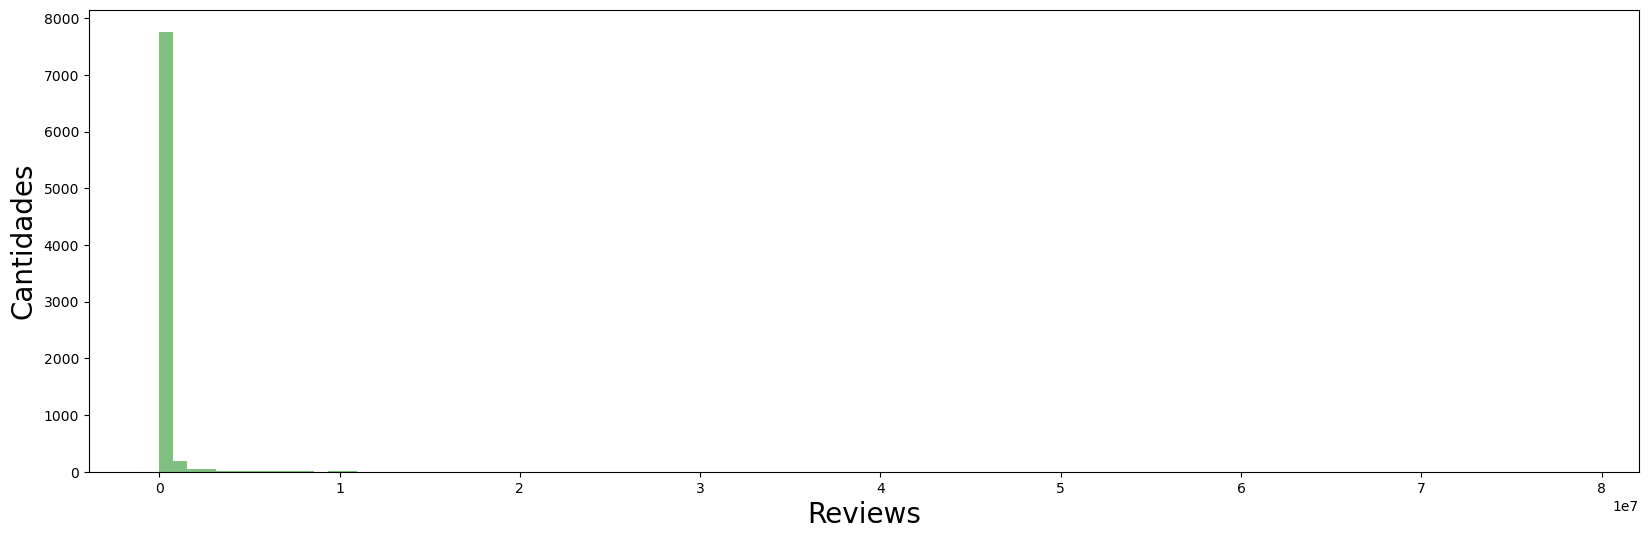

In [58]:
#Reviews

# En este segundo plot vamos a ver el histograma de la cantidad de reviews.
# El parametro bins define la cantidad de sub-intervalos en los que vamos a dividir el eje-x
plt.figure(figsize=(20,6))
plt.hist(google_df['Reviews'], bins=100,color='g' ,alpha=0.5)
plt.xlabel("Reviews",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

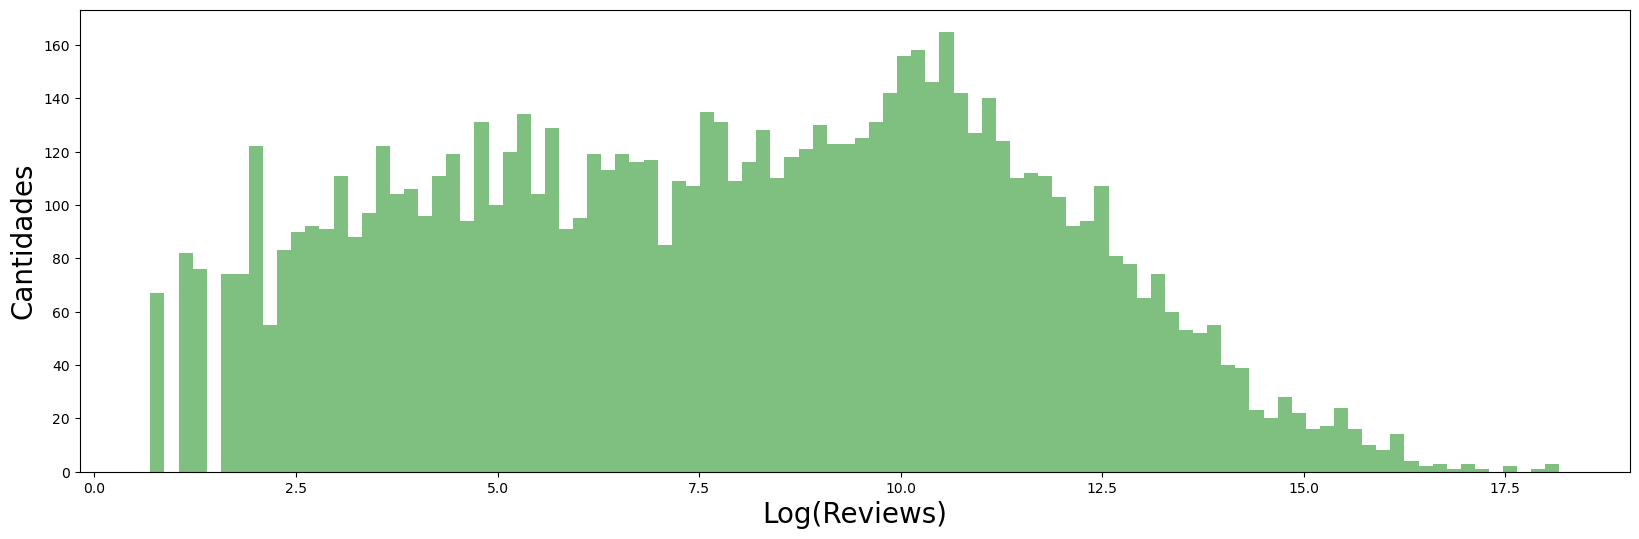

In [59]:
plt.figure(figsize=(20,6))
plt.hist(np.log(1+google_df.Reviews),bins=100, color='g' ,alpha=0.5)
plt.xlabel("Log(Reviews)",size = 20)
plt.ylabel("Cantidades",size = 20)
plt.show()

In [60]:
google_df[google_df.Reviews > 5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,59.185124,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,59.185124,5.000000e+08,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,59.185124,1.000000e+08,Free,0.0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


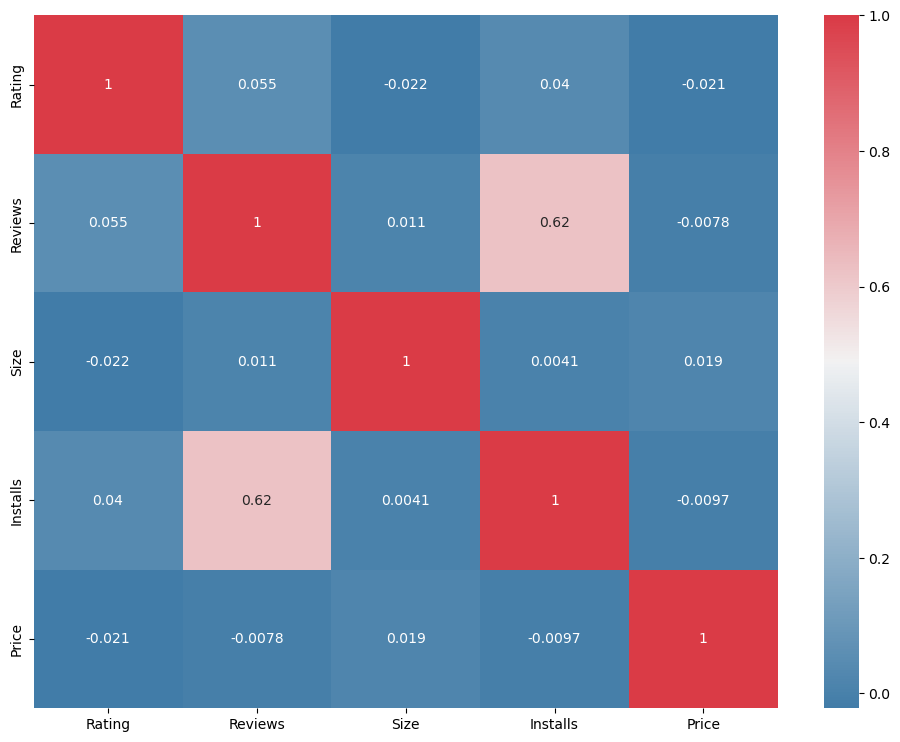

In [61]:
corrmat = google_df.corr()

f, ax = plt.subplots(figsize=(12, 9))
ax = sns.heatmap(corrmat,
               annot=True,
               cmap=sns.diverging_palette(240, 10, as_cmap=True))

In [62]:
# Precio

google_df['Price'].describe()

count    8187.000000
mean        1.038722
std        16.867118
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [63]:

google_df[google_df['Price'] == 400]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000.0,Paid,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up


In [64]:
#Primero defininmos los limites de cada categoria y creamos la columna 'PriceBand'

google_df.loc[ google_df['Price'] == 0, 'PriceBand'] = '0 Free'
google_df.loc[(google_df['Price'] > 0) & (google_df['Price'] <= 0.99), 'PriceBand'] = '1 Muy Barato'
google_df.loc[(google_df['Price'] > 0.99) & (google_df['Price'] <= 2.99), 'PriceBand']   = '2 Barato'
google_df.loc[(google_df['Price'] > 2.99) & (google_df['Price'] <= 4.99), 'PriceBand']   = '3 Normal'
google_df.loc[(google_df['Price'] > 4.99) & (google_df['Price'] <= 14.99), 'PriceBand']   = '4 Caro'
google_df.loc[(google_df['Price'] > 14.99) & (google_df['Price'] <= 29.99), 'PriceBand']   = '5 Muy Caro'
google_df.loc[(google_df['Price'] > 29.99), 'PriceBand']  = '6 #VamoACalmarnos'

In [65]:
#Veamos como es el mean value para las bandas que definimos
google_df[['PriceBand', 'Rating']].groupby(['PriceBand'], as_index=False).mean()

,PriceBand,Rating
0,0 Free,4.166394
1,1 Muy Barato,4.300971
2,2 Barato,4.293220
3,3 Normal,4.237838
4,4 Caro,4.235897
5,5 Muy Caro,4.238889
6,6 #VamoACalmarnos,3.910526


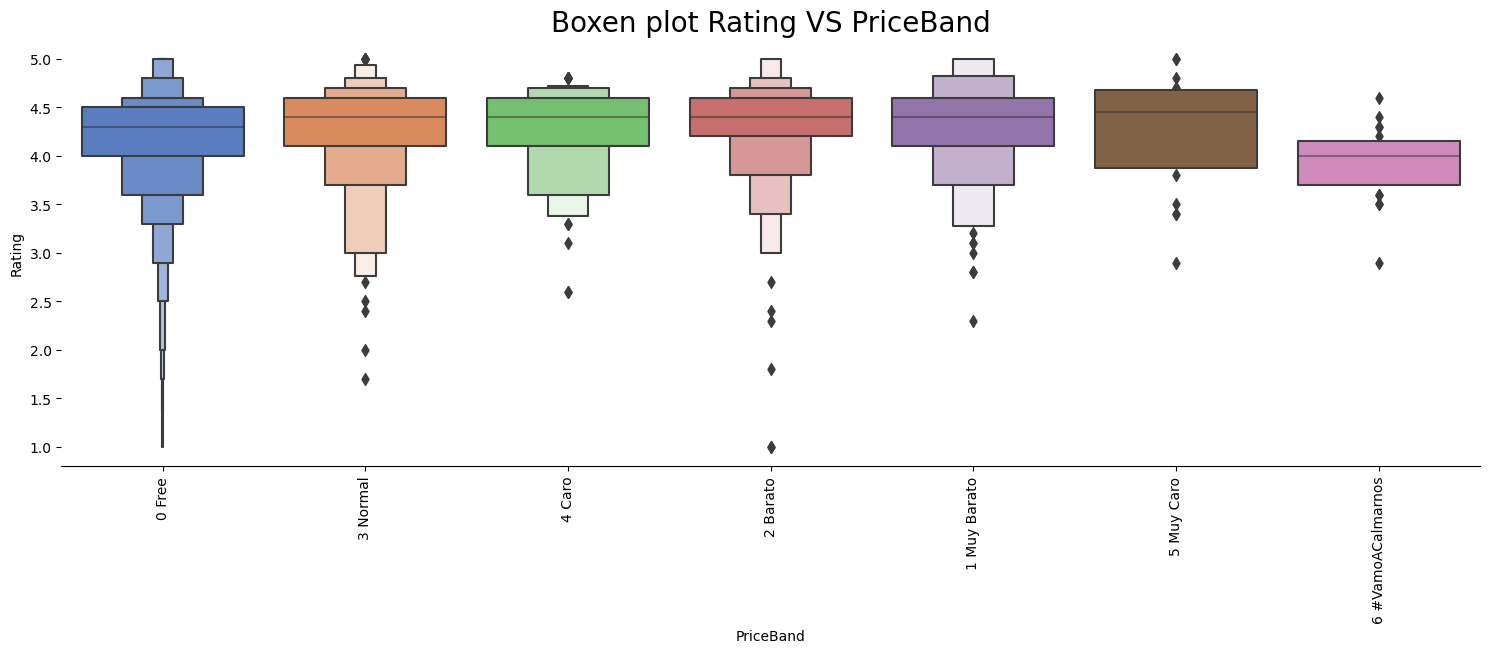

In [66]:
# Ahora en vez de utilizar 'box'(boxplot)
# ingresaremos 'boxen' al argumento 'kind' de la funcion 'catplot'
g = sns.catplot(data=google_df,
                x="PriceBand", y="Rating", 
                kind="boxen", # box , violin
                height = 5,aspect=3 ,palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Boxen plot Rating VS PriceBand',size = 20)
plt.show()